# 📊 Context Vector Evaluation Results Analysis

This notebook analyzes the evaluation results from `outputs2/` folder.

**Metrics analyzed:**
- Accuracy per scale
- BERTScore (Precision, Recall, F1) per scale

In [2]:
import os
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-whitegrid')


sns.set_palette('husl')

# For better visualization
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

## 1. Load Results

In [4]:
# Load all JSON files from outputs2 folder
output_dir = "/home/tjgus0408/CMU/Training-Free-Reasoning-Method/outputs2"
json_files = sorted(glob.glob(os.path.join(output_dir, "example_*.json")))

print(f"Found {len(json_files)} result files:")
for f in json_files:
    print(f"  - {os.path.basename(f)}")

Found 8 result files:
  - example_0.json
  - example_1.json
  - example_2.json
  - example_3.json
  - example_4.json
  - example_5.json
  - example_6.json
  - example_7.json


In [5]:
# Parse all results
all_results = []

for json_file in json_files:
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    example_id = os.path.basename(json_file).replace('example_', '').replace('.json', '')
    
    for result in data.get('results', []):
        eval_result = result.get('eval_result', {})
        
        for scale_str, metrics in eval_result.items():
            scale = float(scale_str)
            
            all_results.append({
                'example_id': int(example_id),
                'pair_idx': result.get('pair_idx', 0),
                'question': result.get('question', '')[:50] + '...',
                'correct_answer': result.get('correct_answer', ''),
                'scale': scale,
                'accuracy': metrics.get('accuracy', 0.0),
                'correct_count': metrics.get('correct_count', 0),
                'total_trials': metrics.get('total_trials', 1),
                'bert_precision': metrics.get('bertscore', {}).get('precision', 0.0),
                'bert_recall': metrics.get('bertscore', {}).get('recall', 0.0),
                'bert_f1': metrics.get('bertscore', {}).get('f1', 0.0)
            })

# Create DataFrame
df = pd.DataFrame(all_results)
print(f"\nTotal records: {len(df)}")
print(f"Unique examples: {df['example_id'].nunique()}")
print(f"Scales: {sorted(df['scale'].unique())}")
df.head(10)


Total records: 24
Unique examples: 8
Scales: [0.0, 1.0, 2.0]


,example_id,pair_idx,question,correct_answer,scale,accuracy,correct_count,total_trials,bert_precision,bert_recall,bert_f1
0,0,0,which of these define dairy item\n\nOptions:\n...,D,0.0,0.0,0,1,0.619039,0.649209,0.633765
1,0,0,which of these define dairy item\n\nOptions:\n...,D,1.0,0.0,0,1,0.619039,0.649209,0.633765
2,0,0,which of these define dairy item\n\nOptions:\n...,D,2.0,0.0,0,1,0.742103,0.742103,0.742103
3,1,0,which of these define oil\n\nOptions:\nA. b\nB...,k,0.0,0.0,0,1,0.665899,0.665899,0.665899
4,1,0,which of these define oil\n\nOptions:\nA. b\nB...,k,1.0,0.0,0,1,0.461960,0.608399,0.525163
5,1,0,which of these define oil\n\nOptions:\nA. b\nB...,k,2.0,0.0,0,1,0.557665,0.547596,0.552584
6,2,0,According to the given food chain what would h...,Fish population would decrease.,0.0,0.0,0,1,0.775147,0.913230,0.838542
7,2,0,According to the given food chain what would h...,Fish population would decrease.,1.0,0.0,0,1,0.775147,0.913230,0.838542
8,2,0,According to the given food chain what would h...,Fish population would decrease.,2.0,0.0,0,1,0.775147,0.913230,0.838542
9,3,0,"According to the given food chain, which is th...",Phytoplankton,0.0,0.0,0,1,0.860974,0.939995,0.898751


## 2. Summary Statistics by Scale

In [6]:
# Create a cleaner summary table
summary_clean = df.groupby('scale').agg({
    'accuracy': 'mean',
    'bert_precision': 'mean',
    'bert_recall': 'mean',
    'bert_f1': 'mean'
}).round(4)

summary_clean.columns = ['Accuracy', 'BERT-P', 'BERT-R', 'BERT-F1']
summary_clean = summary_clean.reset_index()
summary_clean['Scale'] = summary_clean['scale'].astype(str)

print("\n📈 Average Metrics by Context Scale")
print("=" * 60)
print(summary_clean[['Scale', 'Accuracy', 'BERT-P', 'BERT-R', 'BERT-F1']].to_string(index=False))
summary_clean


📈 Average Metrics by Context Scale
Scale  Accuracy  BERT-P  BERT-R  BERT-F1
  0.0       0.0  0.6201  0.6917   0.6531
  1.0       0.0  0.5909  0.6722   0.6282
  2.0       0.0  0.6252  0.7160   0.6647


,scale,Accuracy,BERT-P,BERT-R,BERT-F1,Scale
0,0.0,0.0,0.6201,0.6917,0.6531,0.0
1,1.0,0.0,0.5909,0.6722,0.6282,1.0
2,2.0,0.0,0.6252,0.7160,0.6647,2.0


## 3. Visualization: Accuracy by Scale

/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127919 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127919 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128269 missing from current font.
  font.set_text(s, 0, flags=flags)


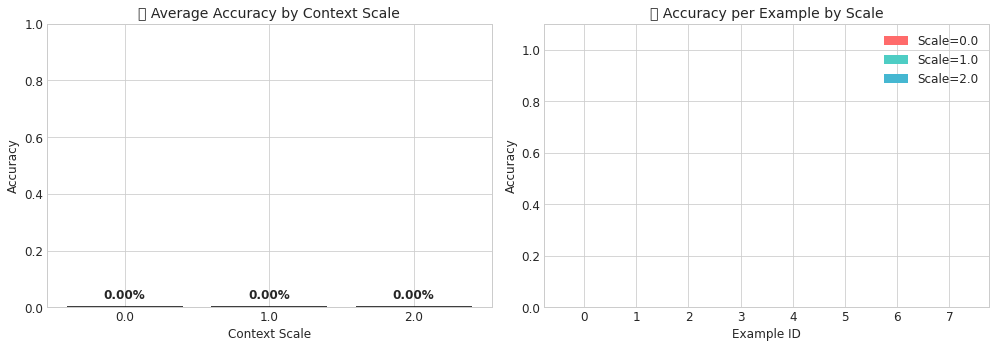

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Accuracy Bar Chart
ax1 = axes[0]
accuracy_by_scale = df.groupby('scale')['accuracy'].mean()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

bars = ax1.bar(accuracy_by_scale.index.astype(str), accuracy_by_scale.values, 
               color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Context Scale')
ax1.set_ylabel('Accuracy')
ax1.set_title('🎯 Average Accuracy by Context Scale')
ax1.set_ylim(0, 1.0)

# Add value labels on bars
for bar, val in zip(bars, accuracy_by_scale.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{val:.2%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Plot 2: Accuracy per Example
ax2 = axes[1]
pivot_accuracy = df.pivot_table(index='example_id', columns='scale', values='accuracy')

x = np.arange(len(pivot_accuracy))
width = 0.25

for i, (scale, color) in enumerate(zip(pivot_accuracy.columns, colors)):
    ax2.bar(x + i*width, pivot_accuracy[scale], width, label=f'Scale={scale}', color=color)

ax2.set_xlabel('Example ID')
ax2.set_ylabel('Accuracy')
ax2.set_title('🔍 Accuracy per Example by Scale')
ax2.set_xticks(x + width)
ax2.set_xticklabels(pivot_accuracy.index)
ax2.legend()
ax2.set_ylim(0, 1.1)

plt.tight_layout()
plt.savefig('accuracy_by_scale.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Visualization: BERTScore Metrics

/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128994 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128309 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128994 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/back

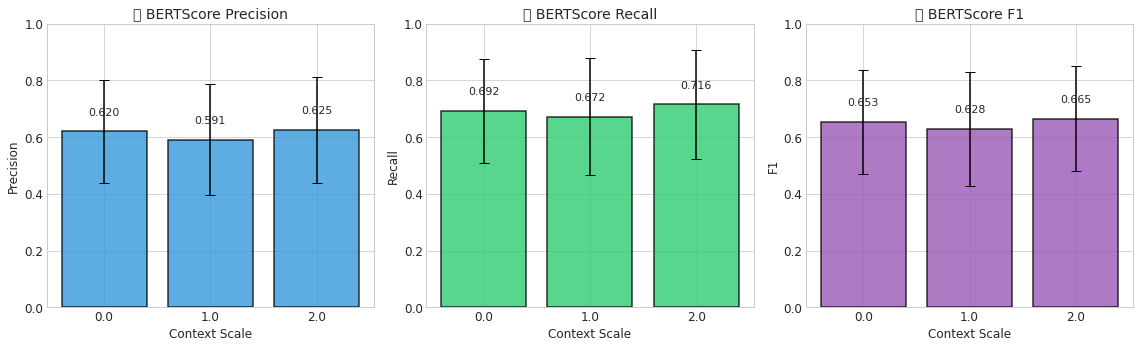

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics = ['bert_precision', 'bert_recall', 'bert_f1']
titles = ['🔵 BERTScore Precision', '🟢 BERTScore Recall', '🟣 BERTScore F1']
colors_list = ['#3498db', '#2ecc71', '#9b59b6']

for ax, metric, title, color in zip(axes, metrics, titles, colors_list):
    means = df.groupby('scale')[metric].mean()
    stds = df.groupby('scale')[metric].std()
    
    bars = ax.bar(means.index.astype(str), means.values, 
                  yerr=stds.values, capsize=5,
                  color=color, edgecolor='black', linewidth=1.5, alpha=0.8)
    
    ax.set_xlabel('Context Scale')
    ax.set_ylabel(metric.replace('bert_', '').title())
    ax.set_title(title)
    ax.set_ylim(0, 1.0)
    
    # Add value labels
    for bar, val in zip(bars, means.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                f'{val:.3f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('bertscore_by_scale.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Combined Metrics Comparison

/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128202 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128202 missing from current font.
  font.set_text(s, 0, flags=flags)


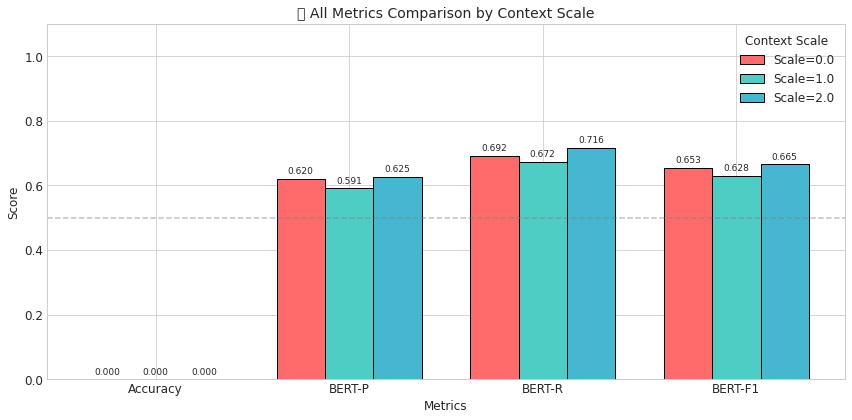

In [9]:
# Prepare data for grouped bar chart
metrics_to_plot = ['accuracy', 'bert_precision', 'bert_recall', 'bert_f1']
metric_labels = ['Accuracy', 'BERT-P', 'BERT-R', 'BERT-F1']

scales = sorted(df['scale'].unique())
x = np.arange(len(metrics_to_plot))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (scale, color) in enumerate(zip(scales, colors)):
    values = [df[df['scale'] == scale][m].mean() for m in metrics_to_plot]
    bars = ax.bar(x + i*width, values, width, label=f'Scale={scale}', color=color, edgecolor='black')
    
    # Add value labels
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{val:.3f}', ha='center', va='bottom', fontsize=9, rotation=0)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('📊 All Metrics Comparison by Context Scale')
ax.set_xticks(x + width)
ax.set_xticklabels(metric_labels)
ax.legend(title='Context Scale')
ax.set_ylim(0, 1.1)
ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('all_metrics_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Heatmap: Per-Example Performance

/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127919 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127919 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128309 missing from current font.
  font.set_text(s, 0, flags=flags)


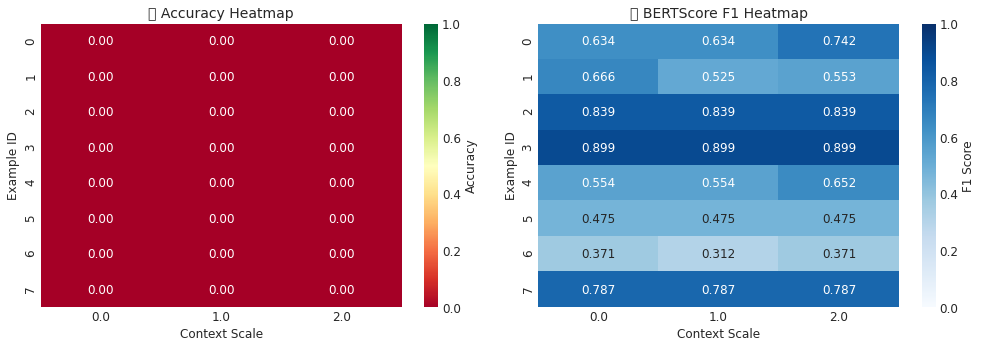

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap 1: Accuracy
pivot_acc = df.pivot_table(index='example_id', columns='scale', values='accuracy')
sns.heatmap(pivot_acc, annot=True, fmt='.2f', cmap='RdYlGn', 
            ax=axes[0], vmin=0, vmax=1, cbar_kws={'label': 'Accuracy'})
axes[0].set_title('🎯 Accuracy Heatmap')
axes[0].set_xlabel('Context Scale')
axes[0].set_ylabel('Example ID')

# Heatmap 2: BERTScore F1
pivot_f1 = df.pivot_table(index='example_id', columns='scale', values='bert_f1')
sns.heatmap(pivot_f1, annot=True, fmt='.3f', cmap='Blues', 
            ax=axes[1], vmin=0, vmax=1, cbar_kws={'label': 'F1 Score'})
axes[1].set_title('🔵 BERTScore F1 Heatmap')
axes[1].set_xlabel('Context Scale')
axes[1].set_ylabel('Example ID')

plt.tight_layout()
plt.savefig('heatmaps.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Line Plot: Trend Analysis

/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tjgus0408/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0, flags=flags)


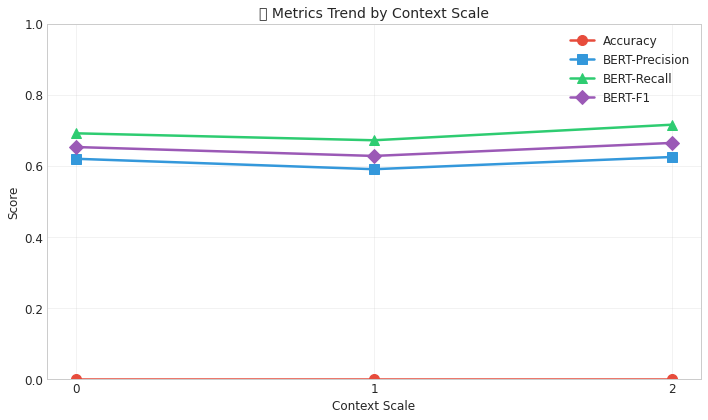

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate means per scale
scale_means = df.groupby('scale').agg({
    'accuracy': 'mean',
    'bert_precision': 'mean',
    'bert_recall': 'mean',
    'bert_f1': 'mean'
})

# Plot lines
markers = ['o', 's', '^', 'D']
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6']
labels = ['Accuracy', 'BERT-Precision', 'BERT-Recall', 'BERT-F1']

for col, marker, color, label in zip(scale_means.columns, markers, colors, labels):
    ax.plot(scale_means.index, scale_means[col], marker=marker, 
            linewidth=2.5, markersize=10, label=label, color=color)

ax.set_xlabel('Context Scale', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('📈 Metrics Trend by Context Scale', fontsize=14)
ax.legend(loc='best')
ax.set_ylim(0, 1.0)
ax.set_xticks(scale_means.index)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('metrics_trend.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Statistical Summary Report

In [12]:
print("=" * 80)
print("📊 FINAL SUMMARY REPORT")
print("=" * 80)

print(f"\n📁 Data Overview:")
print(f"   - Total examples: {df['example_id'].nunique()}")
print(f"   - Total evaluations: {len(df)}")
print(f"   - Scales tested: {sorted(df['scale'].unique())}")

print(f"\n📈 Average Metrics by Scale:")
print("-" * 60)

for scale in sorted(df['scale'].unique()):
    subset = df[df['scale'] == scale]
    print(f"\n   Scale = {scale}:")
    print(f"      Accuracy:       {subset['accuracy'].mean():.4f} ± {subset['accuracy'].std():.4f}")
    print(f"      BERT-Precision: {subset['bert_precision'].mean():.4f} ± {subset['bert_precision'].std():.4f}")
    print(f"      BERT-Recall:    {subset['bert_recall'].mean():.4f} ± {subset['bert_recall'].std():.4f}")
    print(f"      BERT-F1:        {subset['bert_f1'].mean():.4f} ± {subset['bert_f1'].std():.4f}")

# Find best scale
best_accuracy_scale = df.groupby('scale')['accuracy'].mean().idxmax()
best_f1_scale = df.groupby('scale')['bert_f1'].mean().idxmax()

print(f"\n🏆 Best Performing Scale:")
print(f"   - Best Accuracy: Scale = {best_accuracy_scale} ({df[df['scale']==best_accuracy_scale]['accuracy'].mean():.2%})")
print(f"   - Best BERT-F1:  Scale = {best_f1_scale} ({df[df['scale']==best_f1_scale]['bert_f1'].mean():.4f})")

print("\n" + "=" * 80)

📊 FINAL SUMMARY REPORT

📁 Data Overview:
   - Total examples: 8
   - Total evaluations: 24
   - Scales tested: [0.0, 1.0, 2.0]

📈 Average Metrics by Scale:
------------------------------------------------------------

   Scale = 0.0:
      Accuracy:       0.0000 ± 0.0000
      BERT-Precision: 0.6201 ± 0.1830
      BERT-Recall:    0.6917 ± 0.1833
      BERT-F1:        0.6531 ± 0.1828

   Scale = 1.0:
      Accuracy:       0.0000 ± 0.0000
      BERT-Precision: 0.5909 ± 0.1960
      BERT-Recall:    0.6722 ± 0.2074
      BERT-F1:        0.6282 ± 0.2007

   Scale = 2.0:
      Accuracy:       0.0000 ± 0.0000
      BERT-Precision: 0.6252 ± 0.1876
      BERT-Recall:    0.7160 ± 0.1919
      BERT-F1:        0.6647 ± 0.1854

🏆 Best Performing Scale:
   - Best Accuracy: Scale = 0.0 (0.00%)
   - Best BERT-F1:  Scale = 2.0 (0.6647)



## 9. Export Results to CSV

In [ ]:
# # Save summary to CSV
# summary_export = df.groupby('scale').agg({
#     'accuracy': ['mean', 'std', 'min', 'max'],
#     'bert_precision': ['mean', 'std'],
#     'bert_recall': ['mean', 'std'],
#     'bert_f1': ['mean', 'std']
# }).round(4)

# summary_export.columns = ['_'.join(col).strip() for col in summary_export.columns.values]
# summary_export.to_csv('evaluation_summary.csv')

# # Save full data
# df.to_csv('evaluation_full_data.csv', index=False)

# print("✅ Results exported:")
# print("   - evaluation_summary.csv (summary statistics)")
# print("   - evaluation_full_data.csv (all data points)")
# print("\n📊 Figures saved:")
# print("   - accuracy_by_scale.png")
# print("   - bertscore_by_scale.png")
# print("   - all_metrics_comparison.png")
# print("   - heatmaps.png")
# print("   - metrics_trend.png")